# 2. Data Collection and Preparation
* File: `data_processing.ipynb`
* **Purpose**: To load, clean, and preprocess the dataset to ensure quality data for analysis and model building.

* Steps:
    * _Load the datasets_: Import the datasets into the notebook.
    * _Handle Missing Values_: Impute or remove missing values.
    * _Remove Duplicates_: Check and remove any duplicate rows.
    * _Data Type Conversion_: Convert data types where necessary.
    * _Generate Data Summaries_: Frequencies, measures of central tendency, spread, and shape.
    * _Outlier Detection_: Identify and handle outliers if necessary.
    * _Save cleaned data to a csv file_

## 2.1 Data Loading and Initial Exploration

In [1]:
# Import libraries
import pandas as pd # A library used for data manipulation and analysis. It provides data structures like DataFrame for handling data efficiently.
import numpy as np # A library used for numerical operations on large, multi-dimensional arrays and matrices.
import matplotlib.pyplot as plt # A library used for creating static, interactive, and animated visualizations in Python. 
import seaborn as sns # A data visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
import os # A library that provides a way to interact with the operating system e.g. create/remove a directory, file, path handling etc.

In [2]:
# Load the dataset
df = pd.read_excel('../../data/raw/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

-   **`pd.read_excel`**: This is a function from the `pandas` library that reads data from an Excel file and loads it into a DataFrame. 

    -   **`'data/raw/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'`**: This is a string representing the file path to the Excel file. It indicates that the file is located in the `data/raw` directory and is named `INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls`.

    -   **`df`**: This is a variable that will store the DataFrame created by reading the Excel file.
    -   A DataFrame is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns).

In [3]:
# Inspect the top 5 rows in the DataFrame
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


**`df.head()`**: This method from the `pandas` library returns the first 5 rows of the DataFrame `df`. 
- It is commonly used to quickly view a sample of the data to understand its structure, columns, and initial content.

In [4]:
# Inspect and obtain an overview of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

**`df.info()`**: This method provides a concise summary of the DataFrame `df`. 
- It includes information about the DataFrame's structure and data, such as the number of non-null entries, data types of each column, and memory usage.
-   **`<class 'pandas.core.frame.DataFrame'>`**: Indicates that `df` is a DataFrame, a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure provided by the `pandas` library.
    -   **`RangeIndex: 1200 entries, 0 to 1199`**: Shows that the DataFrame contains 1200 rows, indexed from 0 to 1199.
    -   **`Data columns (total 28 columns):`**: Lists the total number of columns in the DataFrame, which is 28.
    -   **Column Information**:
        -   **`#`**: Index of the column.
        -   **`Column`**: Name of the column.
        -   **`Non-Null Count`**: Number of non-null entries in the column (all columns have 1200 non-null values, indicating no missing data).
        -   **`Dtype`**: Data type of the column.
            -   **`int64`**: Integer type (19 columns).
            -   **`object`**: Object type, typically used for text or categorical data (9 columns).
            -   **`memory usage: 262.6+ KB`**: Indicates the amount of memory used by the DataFrame.

In [5]:
# Statistical summary of numerical variables
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


* The `df.describe()` function provides a statistical summary of the numerical variables in the DataFrame. 
count: The number of non-null entries for each column, which is 1200 for all numerical columns, indicating that there are no missing values in these columns.
1. _mean_: The average value of each numerical column. For example, the average age of employees is approximately 36.92 years.
2. _std_: The standard deviation, which measures the dispersion of the values from the mean. For example, the standard deviation of the age is 9.08, indicating variability around the average age.
3. _min_: The minimum value in each column. For example, the minimum age is 18 years.
4. _25%_: This is the 25th percentile value, which means 25% of the data falls below this value. For example, 25% of the employees are 30 or younger.
5. _50%_: The 50th percentile value, also known as the median. For example, the median age is 36 years.
6. _75%_: The 75th percentile value, meaning 75% of the data falls below this value. For example, 75% of the employees are 43 or younger.
7. _max_: The maximum value in each column. For example, the maximum age is 60 years.
* This statistical summary helps in understanding the distribution and spread of numerical variables within the DataFrame, which is useful for further analysis and data cleaning.

In [6]:
# Statistical summary of categorical variables
df.describe(include=['object'])

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


* The `df.describe(include=['object'])` function provides a statistical summary of the categorical (non-numeric) variables in the DataFrame. 
    -   **`count`**: The number of non-null entries for each categorical column, which is 1200 for all columns, indicating that there are no missing values in these columns.
    -   **`unique`**: The number of unique categories in each column. For example, there are 2 unique values for the `Gender` column.
    -   **`top`**: The most frequent category in each column. For example, the most common `Gender` is "Male".
    -   **`freq`**: The frequency of the most common category. For example, "Male" appears 725 times in the `Gender` column.
* This statistical summary helps in understanding the distribution and frequency of categorical variables

## 2.2 Data Cleaning

In [7]:
# Check for missing values if any
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

* The `df.isnull().sum()` function checks for any missing values in the DataFrame and provides the count of missing values for each column. 
    - There were no missing values in the DataFrame

* There are no missing values in the DataFrame hence no need of handling missing values with the following method:

* Handle missing values


df.fillna(df.median(), inplace=True)  # Or use other imputation methods

In [8]:
# Remove any duplicate records in the DataFrame
df.drop_duplicates(inplace=True)

* The `df.drop_duplicates(inplace=True)` function is used to remove duplicate rows from the DataFrame. Here's an explanation of what this command does:
- **`df.drop_duplicates()`**: This method identifies and removes duplicate rows in the DataFrame based on all columns. 
    - It returns a new DataFrame with duplicate rows removed.
- **`inplace=True`**: This parameter modifies the DataFrame in place without returning a new DataFrame. 
    - If `inplace=False` (the default), a new DataFrame with duplicates removed would be returned, and the original DataFrame would remain unchanged.
##### Purpose
* The purpose of this command is to ensure that each row in the DataFrame is unique, which is important for accurate analysis and results. Removing duplicates helps in maintaining the integrity of the data.


In [9]:
# Convert categorical columns to appropriate types
categorical_cols = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 
                     'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']
df[categorical_cols] = df[categorical_cols].astype('category')

-  **`categorical_cols`**: This is a list of column names that are considered categorical variables. 
    - These columns contain values that represent categories or labels, not numerical quantities.
-  **`df[categorical_cols]`**: This selects the columns listed in `categorical_cols` from the DataFrame `df`.
-  **`.astype('category')`**: This method converts the selected columns to the `category` data type. 
    - This is more efficient for categorical data and can improve performance in certain operations, such as grouping or filtering.

##### Purpose
Converting columns to the `category` type helps in:
-  **Memory Efficiency**: Categorical types are more memory-efficient compared to object types because they use integer codes internally.
-  **Performance**: Operations on categorical data can be faster, especially when dealing with large datasets.
-  **Data Analysis**: Ensures that the data is treated appropriately during analysis, such as aggregations or plotting.

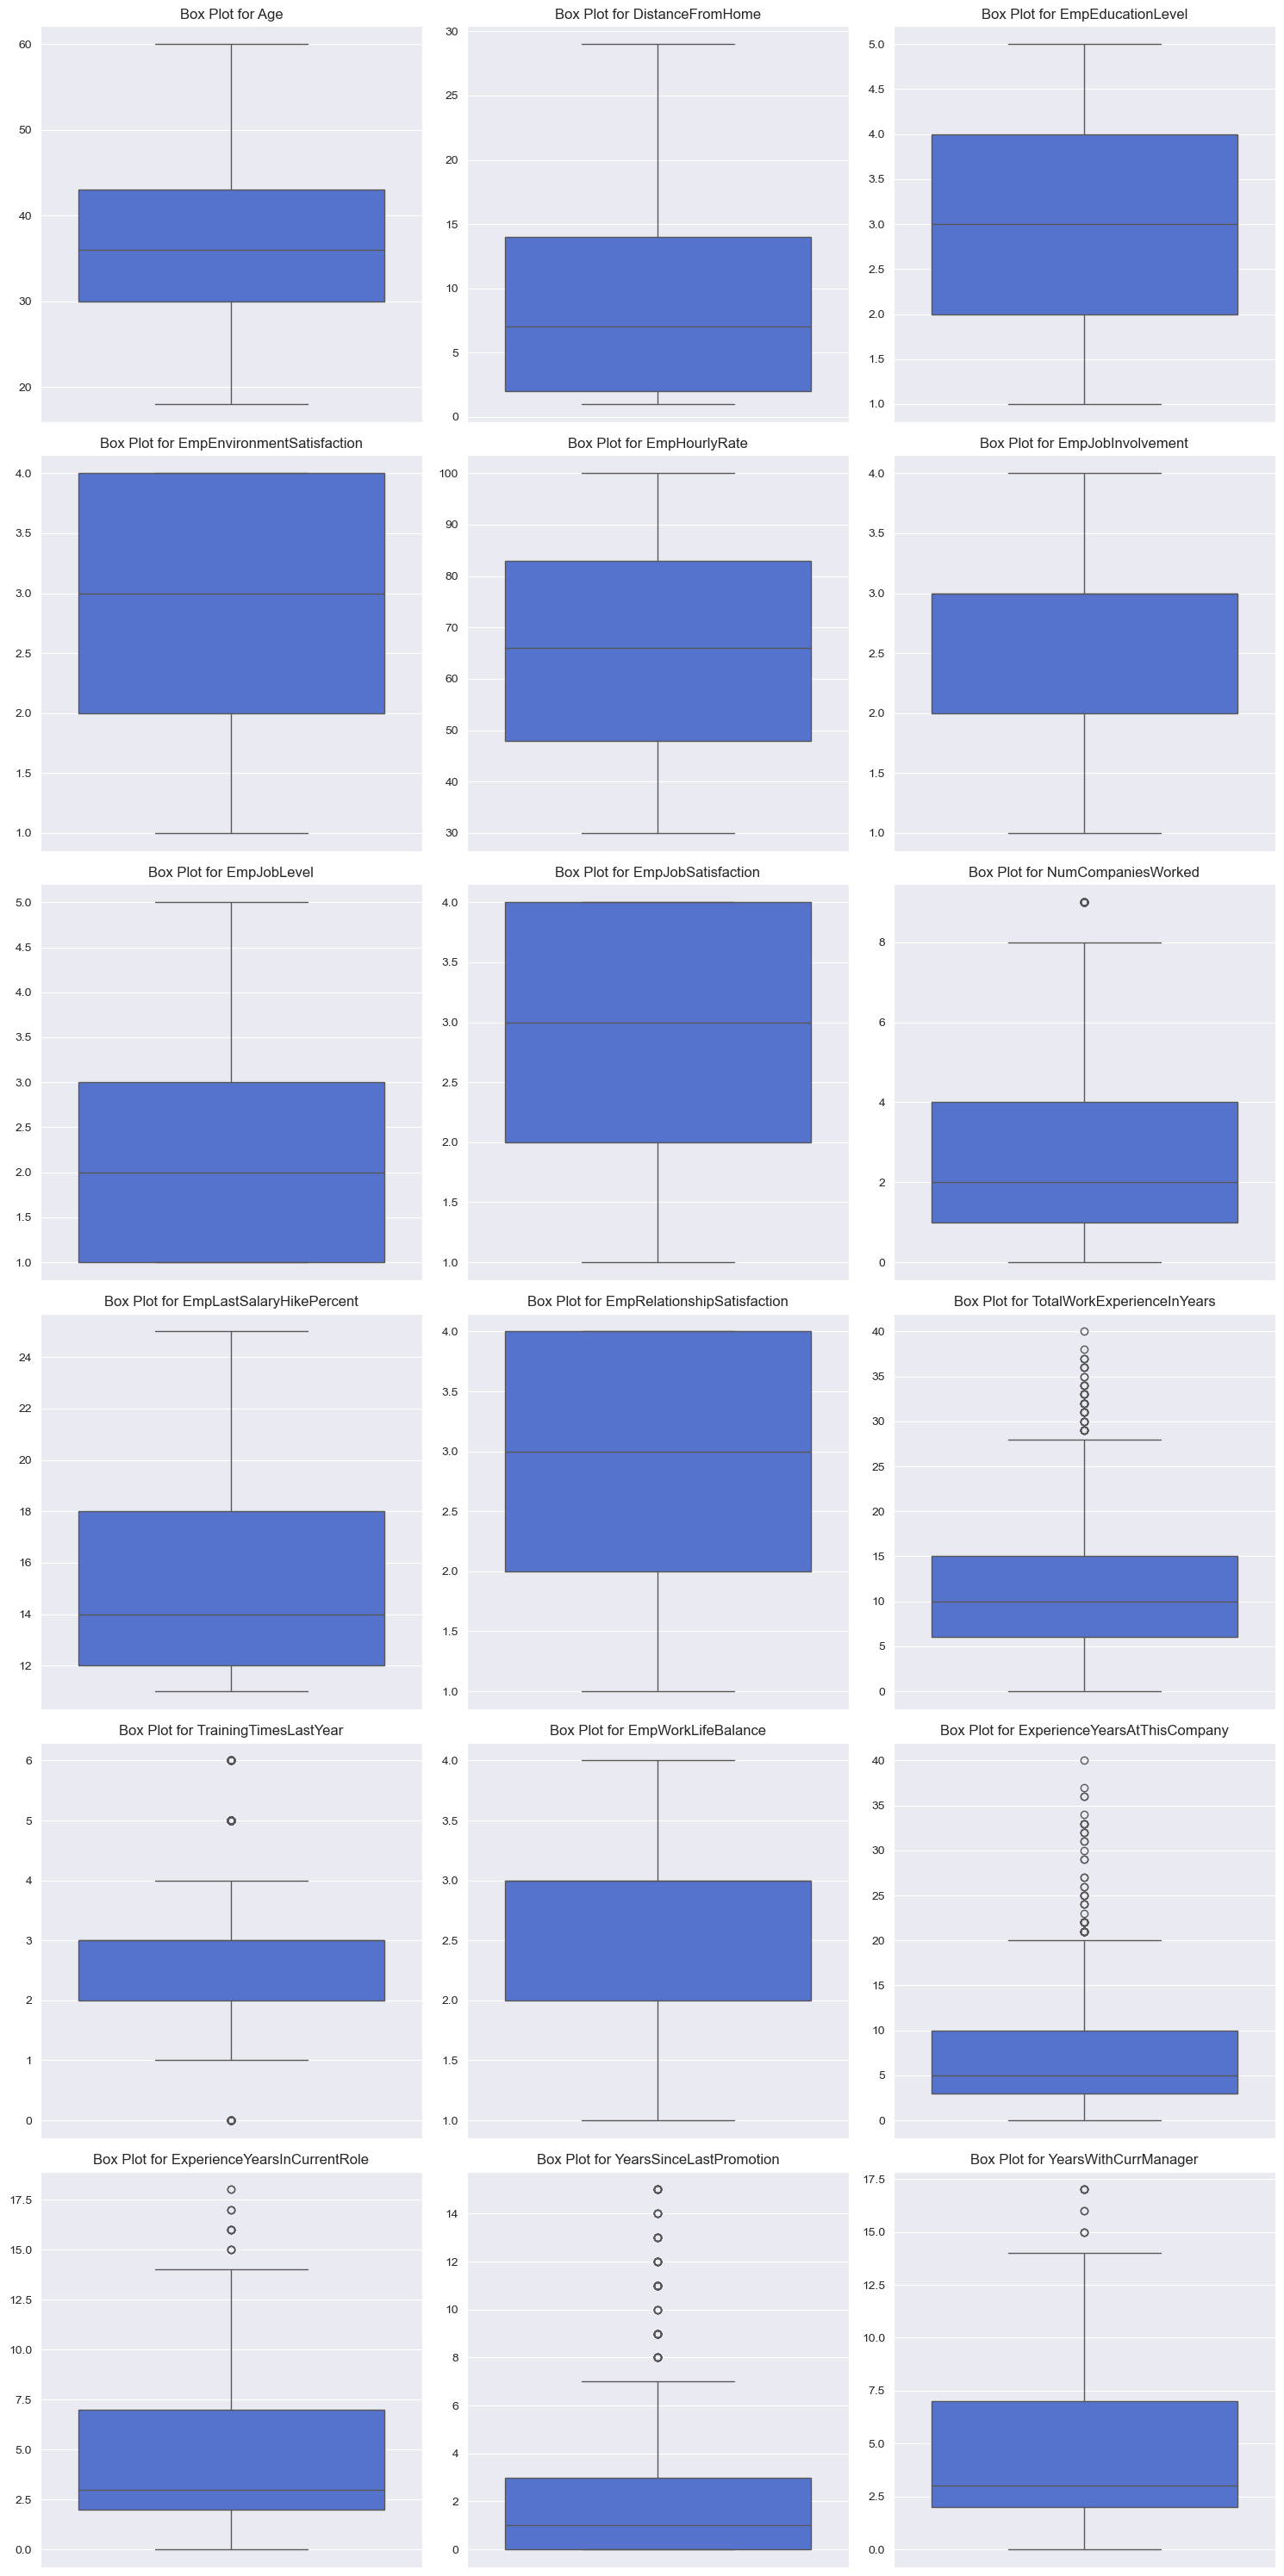

Plots saved to src/visualization\box_plots_matrix.png


In [10]:
# Outlier detection and handling

# 1. Outlier Analysis

# Ensure the directory exists
save_dir = '../visualization'
os.makedirs(save_dir, exist_ok=True)

# Apply dark/darkgrid/white/whitegrid style
sns.set_style('darkgrid')

# Define numerical cols

# Get all numerical columns
all_numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Exclude the specific column 'PerformanceRating'
excluded_column = 'PerformanceRating'
numerical_cols = [col for col in all_numerical_cols if col != excluded_column]

# Number of columns to display per row
ncols = 3
nrows = (len(numerical_cols) + ncols - 1) // ncols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each box plot
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df[col], ax=axes[i], color='royalblue')
    axes[i].set_title(f'Box Plot for {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Save the figure
output_file = os.path.join(save_dir, 'box_plots_matrix.png')
plt.savefig(output_file)

# Show the plot
plt.show()

print(f"Plots saved to {output_file}")


- **Ensure Directory Exists**: Creates the directory `src/visualization` if it doesn't already exist using `os.makedirs`.
    - **Apply Style**: Sets the style of the plots to `'darkgrid'` using `sns.set_style`, which improves the aesthetics of the plots.
    - **Define Numerical Columns**:
    - **`all_numerical_cols`**: Retrieves all columns of numerical data from the DataFrame.
    - **`excluded_column`**: Specifies a column to exclude (`'PerformanceRating'` in this case).
    - **`numerical_cols`**: Filters out the excluded column and creates a list of numerical columns to include in the plots.
- **Subplot Configuration**:
    - **`ncols` and `nrows`**: Determines the layout of the subplots. Sets the number of columns per row and calculates the number of rows needed.
    - **`fig, axes`**: Creates a grid of subplots with the specified number of rows and columns.
- **Plot Each Box Plot**:
    - **`sns.boxplot`**: Generates a box plot for each numerical column, showing the distribution and potential outliers.
    - **`axes[i].set_title`**: Sets the title for each subplot.
    - **`axes[i].set_xlabel('')` and `axes[i].set_ylabel('')`**: Removes axis labels for a cleaner look.
    - **Hide Unused Subplots**: Removes any extra subplots that are not used.
    - **Adjust Layout**: Optimizes the layout of the plots using `plt.tight_layout`.
    - **Save and Show Plot**:
    - **`output_file`**: Defines the path where the plots will be saved.
    - **`plt.savefig`**: Saves the figure to the specified file.
    - **`plt.show`**: Displays the plots on the screen.

In [11]:
# 2. This is how you would address the outliers
# for col in numerical_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     df = df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]
# However, the numerical columns exhibit real-life value ranges and hence no outliers will be removed


-   **Interquartile Range (IQR)**:

    -   **Q1**: The 25th percentile of the data.
    -   **Q3**: The 75th percentile of the data.
    -   **IQR**: The difference between Q3 and Q1, representing the middle 50% of the data.
-   **Outlier Filtering**:

    -   Outliers are typically defined as values that lie below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.
    -   The code filters the DataFrame `df` to exclude any rows where the value in a numerical column falls outside of these bounds.

#### Decision on Outliers
In this dataset, the numerical columns are determined to reflect accurate and realistic data ranges,

In [12]:
# Drop irrelevant columns
df = df.drop(columns=['EmpNumber'])

# In data preprocessing, it is common to drop columns that do not contribute to the analysis or model development. 
# Here, the `EmpNumber` column is removed from the DataFrame.


In [14]:
# Save processed data
df.to_csv('../../data/processed/cleaned_data.csv', index=False)

- After completing the data preprocessing steps, it is essential to save the cleaned and processed data for future use or analysis. 
- The data is saved in CSV format to the specified directory.
- **`df.to_csv('data/processed/cleaned_data.csv', index=False)`**:
    - This command saves the DataFrame `df` to a CSV file named `cleaned_data.csv` in the `data/processed` directory.
      **`index=False`**: This argument ensures that the DataFrame index is not saved as a separate column in the CSV file, keeping the file clean and focused on the actual data.
